In [3]:
import pandas as pd
from tqdm import tqdm_notebook as tqdm

In [4]:
df = pd.read_parquet('logs.parquet')
users = list(set(df['userId']))

In [5]:
data = dict()

for user in tqdm(users):
    data[user] = df[df['userId'] == user].sort_values('date')

/tmp/ipykernel_49503/1958515435.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for user in tqdm(users):


  0%|          | 0/2171 [00:00<?, ?it/s]

In [6]:
l = len(set(list(df['userId'])))

In [7]:
l

2171

In [8]:
a = df[df['is_video']]
a[a['upnext_content'].str.len() < 3].groupby('is_injected').count()

,userId,visaId,intervention,url,date,day,intervention_stage,is_homepage,homepage_content,is_video,is_search,upnext_content,search_query
is_injected,,,,,,,,,,,,,
False,36707,36707,36707,36707,36707,36707,36707,36707,0,36707,36707,36707,0
True,144863,144863,144863,144863,144863,144863,144863,144863,0,144863,144863,144863,0


In [9]:
def get_id(url):
    if len(url.split('v=')) <= 1:
        return None
    url = url.split('v=')[1]
    url = url.split('&')[0]
    return url

def decode_upnext(urls):
    urls = eval(urls.decode('utf-8'))
    ids = []
    for u in urls:
        ids.append(get_id(u))
    return ids

In [10]:
session_active

NameError: name 'session_active' is not defined

In [ ]:
sessions = dict()
for user in users:
    sessions[user] = []
    
    sess = data[user][['date', 'url', 'is_video', 'upnext_content']].to_dict('records')
    session = []
    session_active = False
    for watch in sess:
        # when waiting for first video in a session
        if not session_active and watch['is_video']:
            session = []
            session.append(watch)
            session_active = True

        # back to back videos
        elif session_active and watch['is_video']:
            upnexts = decode_upnext(session[-1]['upnext_content'])
            this_url = get_id(watch['url'])
            if this_url in upnexts:
                session.append(watch)


        # if next watch is not video when session active
        elif session_active and not watch['is_video']:
            session_active = False
            if len(session) > 1:
                sessions[user].append(session)
            session = []

In [ ]:
sizes = []
for a in all_sessions:
    sizes.append(len(a))

In [ ]:
pd.DataFrame(sizes)

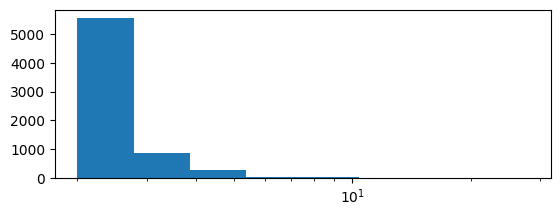

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

x = sizes
x = pd.Series(x)

# histogram on linear scale
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.subplot(212)
plt.hist(x, bins=logbins)
plt.xscale('log')
plt.show()

In [147]:
np.sum(sizes)/len(all_sessions)

2.2663413191363504

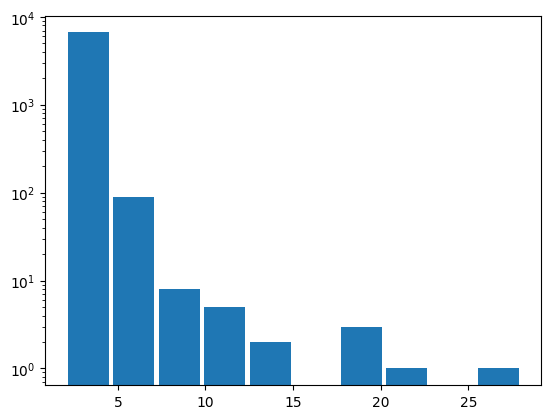

In [143]:
plt.hist(sizes, rwidth=0.9)
plt.yscale('log')

In [131]:
137803/len(all_sessions)

20.37902987281869

In [109]:
all_sessions = []

for user in sessions:
    for session in sessions[user]:
        if len(session) > 0:
            all_sessions.append(session)

In [115]:
watch

{'date': Timestamp('2022-12-16 14:25:28.128000'),
 'url': 'https://www.youtube.com/watch?v=489B7RNudAQ',
 'is_video': True,
 'upnext_content': b'["https://www.youtube.com/watch?v=ZOZyo6YOAu4","https://www.youtube.com/watch?v=VtYi8AR11WM","https://www.youtube.com/watch?v=Q32BGQmVLJ0","https://www.youtube.com/watch?v=h1BsKIP4uYM","https://www.youtube.com/watch?v=4u5I8GYB79Y","https://www.youtube.com/watch?v=pWAyV_GoJxA","https://www.youtube.com/watch?v=roSRpjgxvnQ","https://www.youtube.com/watch?v=oD_MQMqnvoE","https://www.youtube.com/watch?v=CuluhA3S--U","https://www.youtube.com/watch?v=CwVTvKVPRQ0","https://www.youtube.com/watch?v=uFKRr3XWgyA","https://www.youtube.com/watch?v=m4W_O63qRvs","https://www.youtube.com/watch?v=CMMYYajwLms","https://www.youtube.com/watch?v=ANZDDO9TKc4","https://www.youtube.com/watch?v=XYG8s9CSLWY","https://www.youtube.com/watch?v=VFpk6MV42zg","https://www.youtube.com/watch?v=XENqcS9Wj34","https://www.youtube.com/watch?v=FNS3l8yvvrE","https://www.youtube.com/w

In [126]:
import pickle as pkl
pkl.dump(all_sessions, open('all_sessions', 'wb'))

In [122]:
ranks = []
for session in all_sessions:
    for watch, upnext in zip(session[:-1], session[1:]):
        upnexts = decode_upnext(watch['upnext_content'])
        upnext = get_id(upnext['url'])
        rank = upnexts.index(upnext)
        if rank < 10:
            
            ranks.append(rank)

In [ ]:
videos = pd.read_pickle('')

In [129]:
len(all_sessions)/len(data)

3.114693689543989

(array([2821., 1341.,  813.,  667.,  551.,  370.,  334.,  247.,  222.,
         191.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

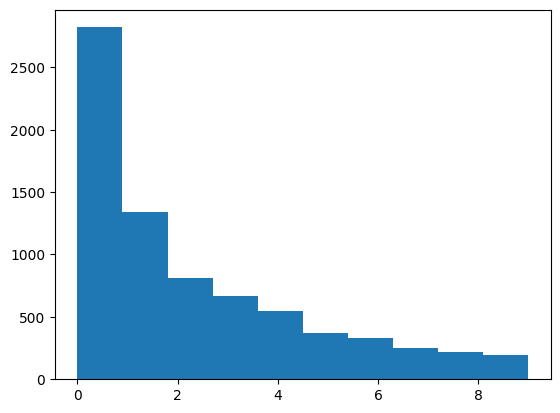

In [123]:
from matplotlib import pyplot as plt
plt.hist(ranks)

In [54]:
for s in sess:
    if s['upnext_content']:

NameError: name 'aldf' is not defined

In [51]:
import math

In [57]:
decode_upnext(s['upnext_content'])

['Fe_ParUnmyk', 'VToDFlDZxyA', 'En4VfqgM14c']

In [61]:
s

{'date': Timestamp('2022-12-13 16:44:36.735000'),
 'url': 'https://www.youtube.com/watch?v=lOlYvF946GI',
 'is_video': True,
 'upnext_content': b'["https://www.youtube.com/watch?v=Fe_ParUnmyk","https://www.youtube.com/watch?v=VToDFlDZxyA","https://www.youtube.com/watch?v=En4VfqgM14c"]'}

In [62]:
get_id(s['url'])

'lOlYvF946GI'